Ceren Yılmaz Gülten 
Exercise 9 

In [2]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import minimize
from scipy import optimize

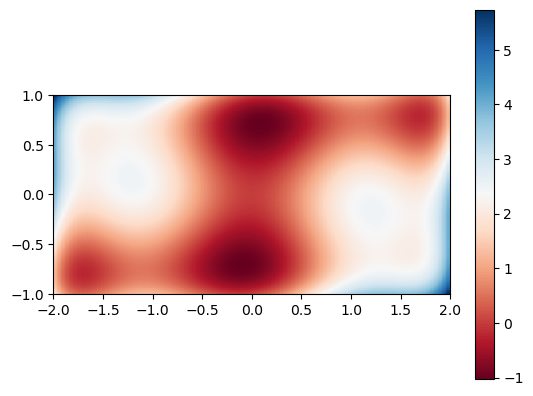

Minimum:  [0.09463775] Value:  -1.0196963104124626
Minimum:  [-0.09463777] Value:  -1.0196963104125045
Minimum:  [0.09463917] Value:  -1.0196963104084529
Minimum:  [-0.09463918] Value:  -1.0196963104083394
Minimum:  [0.] Value:  0.0


In [8]:
# 1. 2D minimization of a six-hump camelback function
 
def f(x,y):
    return (4- 2.1*(x**2) + (x**4)/3)*x**2 + x*y + (4*(y**2) - 4)*y**2

x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-1.0, 1.0, 100)
x, y = np.meshgrid(x,y)

fig = plt.figure()
image = plt.imshow(f(x,y), cmap='RdBu', extent=[-2, 2, -1, 1])
plt.colorbar(image, orientation='vertical')
plt.show()
def func(point):
    return f(*point) # pass a variable number of arguments to a function, it will send the points to 
points = [[-0.15,-0.75], [0.15,0.75], [-1.75, -0.75], [1.75, 0.75]] # point selected approximately based on meshgrid

# optimally trying all points for optimize minimum 
for point in points:
    minimum = minimize(f, point[0],point[1])
    print("Minimum: ", minimum.x, "Value: ", minimum.fun)
# to find (x,y) = (0,0)
minimum_zero = minimize(f, 0,0)
print("Minimum: ", minimum_zero.x, "Value: ", minimum_zero.fun)

Text(0.5, 0, 't')

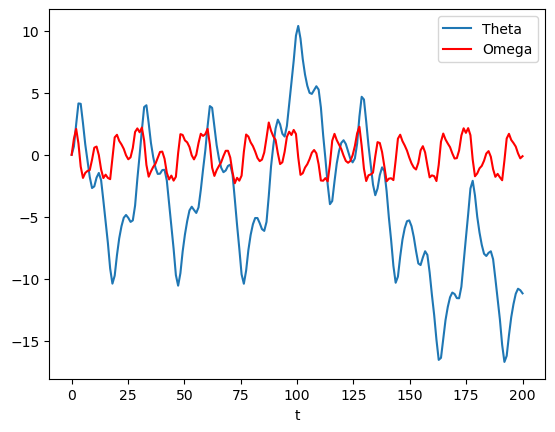

In [19]:
# 2. Non-linear ODE: the damped pendulum
from scipy.integrate import odeint
#pendulum function definition 
def pendulum(y, t, Q, d, omega):
    theta, Omega = y # in odeint the second argument is y0 and it is includes initial conditions on y 
    diff_result = [Omega, -(1/Q)*Omega + np.sin(theta) + d*np.cos(omega*t)]
    return diff_result

initial_w_theta = [0, 0]
Q = 2.0 #damping factor 
d = 1.5 #forcing amplitude 
omega = 0.65 # driving frequency of the forcing 
t = np.linspace(0, 200,200) # time (solve with over a pariod 200 time steps)

result = odeint(pendulum, initial_w_theta, t, args=(Q, d, omega)) # args in the odeint pass the extra parameters to function

plt.plot(t, result[:, 0], label="Theta") 
plt.plot(t, result[:, 1], color='r', label="Omega")
plt.legend(loc='best')
plt.xlabel('t')



C:\Users\crnyl\AppData\Local\Temp\ipykernel_1436\533131707.py:18: RuntimeWarning: divide by zero encountered in true_divide
  period_population = 1/(fftpack.fftfreq(data.shape[0], numb_year[1]-numb_year[0]))


Text(0, 0.5, 'Power')

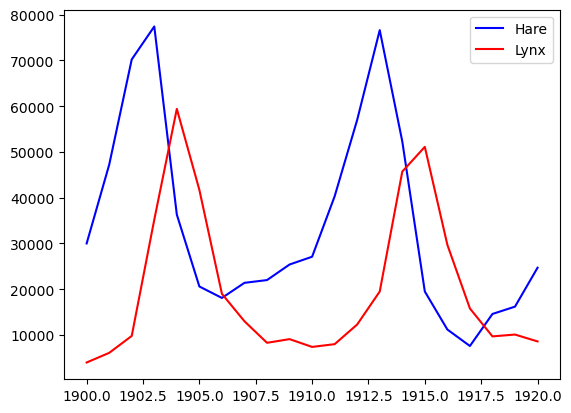

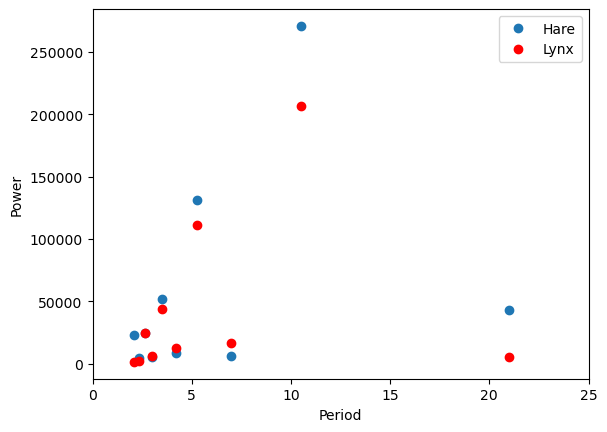

In [28]:
# 3. FFT of a simple dataset
from scipy import fftpack
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
data = np.loadtxt('data/populations.txt')
numb_year, hare, lynx, carrot = data.T

plt.plot(numb_year, hare, color='b', label='Hare') 
plt.plot(numb_year, lynx, color='r', label='Lynx')
plt.legend(loc='best')

# for the periodicity analysis 
hare_fft = fftpack.fft(hare)
lynx_fft = fftpack.fft(lynx)

abs_hare = np.abs(hare_fft)
abs_lynx = np.abs(lynx_fft)

period_population = 1/(fftpack.fftfreq(data.shape[0], numb_year[1]-numb_year[0]))
plt.figure()
plt.plot(period_population,abs_hare,'o',  label='Hare')
plt.plot(period_population,abs_lynx, 'o', color='r', label='Lynx')
plt.legend(loc='best')
plt.xlim(0, 25)
plt.xlabel('Period')
plt.ylabel('Power')

Text(0.5, 1.0, 'Filtered')

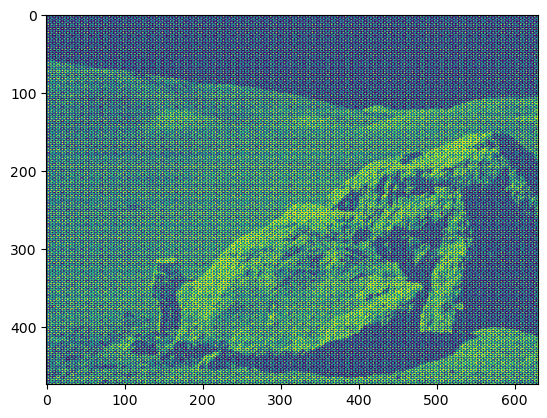

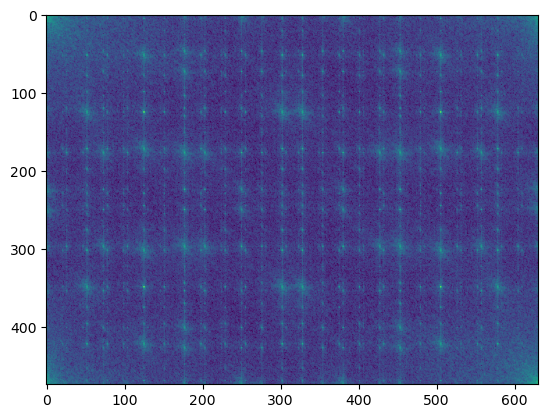

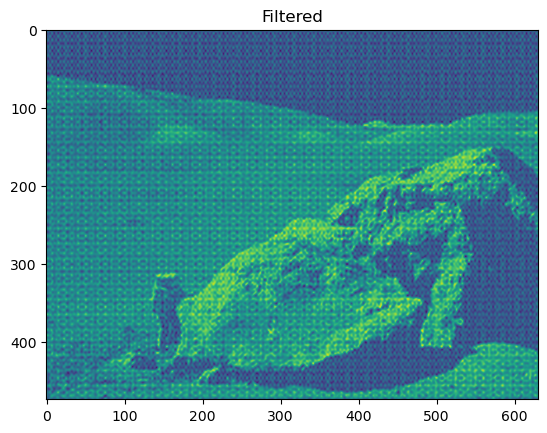

In [40]:
# 4. FFT of an image
img= plt.imread("img/moonlanding.png")
plt.imshow(img)
plt.figure()
fft_image = fftpack.fft2(img)
plt.imshow(abs(fft_image), norm=LogNorm(vmin=5))

#fraction of coefficients
filter_coef = 0.2
col, row = fft_image.shape #column and row size
# array slicing to set the noise regions to zero
fft_image[int(col*filter_coef):int(col*(1-filter_coef))] = 0 
fft_image[:, int(row*filter_coef):int(row*(1-filter_coef))] = 0 

filtered = fftpack.ifft2(fft_image).real 
plt.figure()
plt.imshow(filtered)
plt.title('Filtered')